In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("../Downloads/訓練用.csv")
data

,time,electricity_use,population,export,temperature,month,year
0,200401,15019.89936,22610665,12448.066,16.93333,1,2004
1,200402,14529.58879,22615997,13894.179,18.46667,2,2004
2,200403,16623.98503,22621478,15529.974,19.83333,3,2004
3,200404,16326.63390,22626589,14824.711,23.66667,4,2004
4,200405,17046.75344,22632661,16536.549,27.30000,5,2004
...,...,...,...,...,...,...,...
199,202008,25233.04577,23574334,31158.476,29.26667,8,2020
200,202009,25362.56408,23568378,30702.877,28.53333,9,2020
201,202010,24040.66957,23566471,32215.149,26.16667,10,2020
202,202011,22642.77313,23563356,31935.760,24.33333,11,2020


In [3]:
scaler = StandardScaler()
training_scale = pd.DataFrame(scaler.fit_transform(data.values), columns=data.columns, index=data.index)
training_scale

,time,electricity_use,population,export,temperature,month,year
0,-1.644179,-2.186896,-1.989906,-2.344307,-1.791918,-1.593255,-1.632993
1,-1.642138,-2.392997,-1.972598,-2.029093,-1.428042,-1.303572,-1.632993
2,-1.640097,-1.512621,-1.954806,-1.672533,-1.103721,-1.013890,-1.632993
3,-1.638056,-1.637612,-1.938216,-1.826262,-0.194034,-0.724207,-1.632993
4,-1.636014,-1.334911,-1.918506,-1.453127,0.668188,-0.434524,-1.632993
...,...,...,...,...,...,...,...
199,1.636014,2.106180,1.138224,1.734065,1.134897,0.434524,1.632993
200,1.638056,2.160623,1.118890,1.634756,0.960869,0.724207,1.632993
201,1.640097,1.604967,1.112700,1.964391,0.399239,1.013890,1.632993
202,1.642138,1.017364,1.102589,1.903492,-0.035830,1.303572,1.632993


In [4]:
x = training_scale[["population", "export", "temperature", "month", "year" ]]
y = training_scale["electricity_use"]
#x = data[["population", "export", "temperature", "month" ]]
#y = data["electricity_use"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 33 )

In [5]:
import xgboost as xgb
from matplotlib import pyplot

eval_set = [(x_test, y_test)]
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,  
    max_depth=7,  
    eta=0.1,  
    subsample=0.7,  
    colsample_bytree=0.8,
)
xgb_reg.fit(x_train, y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [6]:
test_data = pd.read_csv("../Downloads/測試用.csv")
xgb_reg.predict(test_data[["population", "export", "temperature", "month", "year" ]])


array([1.9992157, 1.9196385, 1.9196385, 1.9196385, 1.9196385, 1.9196385,
       1.9196385, 1.9196385, 1.9196385, 1.9196385, 1.9196385, 1.9196385,
       1.9992157, 1.9196385, 1.9196385, 1.9196385, 1.9196385, 1.9196385,
       1.9196385, 1.9196385, 1.9196385, 1.9196385, 1.9196385, 1.9196385,
       1.9992157, 1.9196385, 1.9196385], dtype=float32)

In [7]:
print(xgb_reg.score(x_train, y_train))
print(xgb_reg.score(x_test, y_test))

0.9999996359372296
0.8954070462349499


In [8]:
testing_scale = pd.DataFrame(scaler.fit_transform(test_data.values), columns=test_data.columns, index=test_data.index)


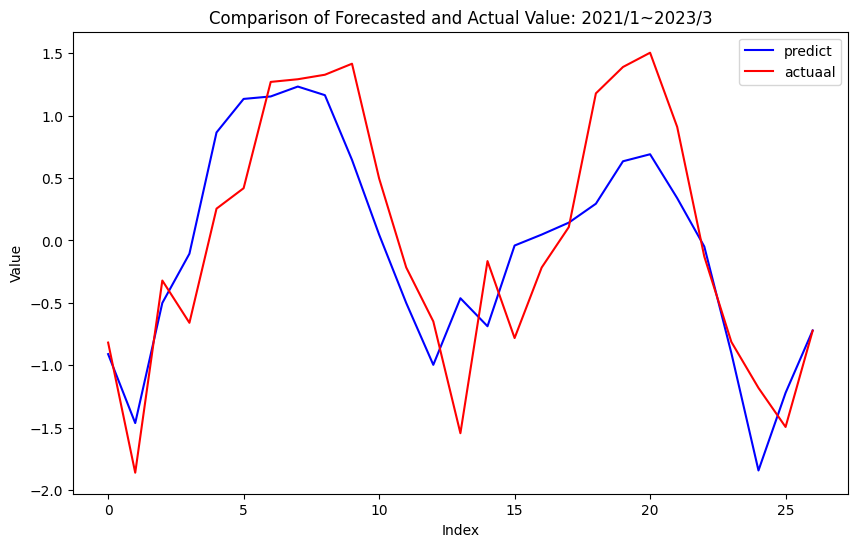

In [14]:
x = test_data.index
y1 = xgb_reg.predict(testing_scale[["population", "export", "temperature", "month", "year" ]])
y2 = testing_scale["electricity_use"]

plt.figure(figsize=(10, 6))

# 繪製第一條折線圖
plt.plot(x, y1, label="y1", color="blue")

# 繪製第二條折線圖
plt.plot(x, y2, label="y2", color="red")

# 設定圖例
plt.legend(['predict', 'actuaal'])

# 設定x軸和y軸的標籤
plt.xlabel("Index")
plt.ylabel("Value")

# 設定圖形的標題
plt.title("Comparison of Forecasted and Actual Value: 2021/1~2023/3")

#儲存圖片
plt.savefig('Comparison of Forecasted and Actual Value.png')

# 顯示圖形
plt.show()
